
# Projet optimisation 

## Modélisation

Dans ce sujet, on cherche à chauffer un bâtiment résidentiel de sorte à minimiser la facture électrique du consommateur, tout en garantissant le  confot des occupants.

### 1. Ecrire la fonction objectif

L'objectif global est de minimiser la facture des occupants de la maison, cela revient à minimiser la fonction suivante.
$$\boxed{P(t)= \int_{t_0}^{t}{p}^{p/c}(t)w(t).dt}$$
- $t_0$ le temps initial
- $w(t)$ la charge souscrite à $t$
- $p_i^{p/c}(t)$ le prix de l'énergie à $t$ suivant si $t$ correspond à une heure pleine ou une heure creuse.
- $P(t)$ le montant de la facture entre $t_0$ et $t$ pour une consommation suivant la charge $w$ au prix $p$

### 2. Modélisation dynamique de la température du bâtiment
On va considérer la maison comme un cube d'arrête $a$, et de face de surface $S=a^2$. On considère alors que les murs sont assez fins par rapport à la taille de l'édifice général pour que l'on puisse considérer la surface intérieure comme égale à la surface extérieure du cube. On alors $S_{ext} = S_{int} = 5.S_{mur}$ (on considère qu'il n'y pas d'échange maison-sol). Onsuppose que les variations de températures sont quasistatiques.

> Les principales sources de perturbation extérieures de la température sont, **l'apport d'énergie par le soleil** par rayonnement , et **l'appport par le chauffage**, on compte aussi en négatif **la perte d'energie au nieveau des murs**.


Notons :
- $t$ le temps
- $T_{int}(t)$ la température de la maison supposée homogène
- $T_{ext}(t)$ la température extérieure
- $T_s(t)$ la température à la surface extérieure de la maison
- $\Phi_s(t)$ le flux solaire moyen($W/m^2$)
- $Q_{chauff}(t)$ la chaleur produite par le chauffage
- $\Phi_{pertes}(t)$ le flux émis de l'intérieur vers l'extérieur 

On peut associer aux murs de la maison une résistance thermique telle que $\Delta_{int\to ext} = R_{th}\Phi_{pertes}$. Par exemple la résistance est donnée par $R_{th} = \frac{e}{\lambda S_{ext}}$ dans le cadre unidimensionnel. 


![Title](modele.JPG)

#### _**Modèle Physique**_
Si l'on considère une petite transformation pendant $dt$. 
L'écriture du premier principe à la maison $\Sigma = { \ air \ à \ l'intérieur}$  nous donne :
$$dU = C_{m}dT = Q_{chauffage} + Q_{Rayonnement} - Q_{Pertes}$$
On néglige $Q_{anthropique}$.
$$C_{m}dT = w(t)dt + \alpha \Phi_sS_{ext}dt + \frac{T_{ext}-T}{R_{th}}dt$$
d'où:

$$\boxed{\frac{dT}{dt} + \frac{T}{R_{th}C_{m}} =\frac{1}{C_{m}}\Bigg[w(t) +\alpha \Phi_sS_{ext} +\frac{T_{ext}}{R_{th}}  \Bigg]}$$

### 3. Discrétisation du problème 

Dans le cadre général en notant $T_i = T(\tau i)$, si $\tau$ est suffisament petit devant les durées de variation de $w$, $\Phi_s$ et $T$  on peut écrire :
$$\boxed{\Delta T= T_{i+1}-T_{i}=\frac{\tau}{C_{m}}[w(i\tau) +\alpha \Phi_s(\tau i )S_{ext} + \frac{T_{ext}(\tau i )-T_i}{R_{th}}]} \ \ - \ \ (E)$$

Dans le cadre des données fournies sur $OASIS$. on a $\forall t, w(t) = 0$.
D'où :
$$\Delta T= T_{i+1}-T_{i}=\frac{\tau}{C_{m}}[\alpha \Phi_s(\tau i )S_{ext} + \frac{T_{ext}(\tau i )-T_i}{R_{th}}]$$

Or si on fait l'hyphothèse d'une maison cubique de volume $V = S^{\frac{3}{2}}$. Or $C_m = C_{massique}\rho_{air}V =  C_{massique}\rho_{air}S^{\frac{3}{2}}$. 
D'où $S = (\frac{C_m}{C_{massique}\rho_{air}})^{\frac{2}{3}}$

Or on a $C_{massique} = 1004  J.K^{-1}kg^{-1}$ et $\rho_{air} = 1 \ kg.m^{-3}$
- On remarque que on connait l'évolution temporelle de la  température de la maison pour $W(t)=0$, ainsi que de la température extéireure et l'ensoleillemnent associé
- Les paramètres de notre problème sont :
    - La longueur d'un côté $a$
    - La résistance surfacique thermiques des murs
    - La résistance thermique de l'ensemble de la maison.
    - La part $\alpha$ du flux solaire arrivant à chauffer l'air de la maison. 
    - La capacité de la maison $C_m$

- Cependant on décompte uniquement 3 variables signicatives que sont : $R,\alpha, R_{surf}$. En effet :
  - $a = \sqrt{\frac{R}{R_{surf}}}$ (On choisit R_surf pour pouvoir juger rapidement de la faisabilité de l'épaisseur des murs modélisés)
  - $C_m = C_{massique}\rho_{air}a^3$

- On cherche donc les paramètres qui permettent d'approcher les différentes valeurs par une fonction respectant l'equation différentielle présentée plus haut.
- > **Hypothèse** : On va supposer que la constante de discrétisation $\tau$ est très petite devant la constante de temps du modèle $\delta$. Par ailleurs $w$ et $\Phi_s et T_{ext}$ étant mesurée toutes les 30 minutes, on va les supposer constant sur cette durée, et donc ne contraignent en rien la valeur de $\tau$
- Pour trouver les paramètres significatifs on effectue une regression lineaire en utilisant la méthode des moindres carrés. Cela revient à résoudre le problème d'optimisation suivant, en notant $T,w,\Phi_s, T_{ext}, \Delta T$ les vecteurs de valeurs corespondantes aux temps d'observations : 
$$
\min_{\alpha, R_{th}, R_{surf} \in \mathbb{R}_+^3} {||{\frac{\tau}{C_{m}}[w +\alpha \Phi_s\frac{R_{th}}{R_{surf}} + \frac{T_{ext}-T}{R_{th}}]-\Delta T}||}
$$






In [37]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize

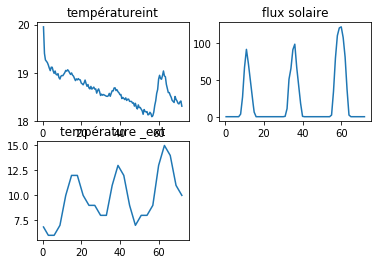

In [56]:
# Extraction des données
data = np.loadtxt('donnees-projet-gr4.txt')
heure = data.transpose()[0]
T_int = data.transpose()[1]
phi_sol = data.transpose()[2]
T_ext = data.transpose()[3]
plt.subplot((221))
plt.plot(heure,T_int)
plt.title('températureint')
plt.subplot((222))
plt.plot(heure,phi_sol)
plt.title('flux solaire')
plt.subplot(223)
plt.plot(heure,T_ext)
plt.title('température _ext')
#Création du vecteur des différences   
diff = []
for i in range (1, len(T_int)):
    diff.append(T_int[i]-T_int[i-1])
diff  = np.array(diff)
diff = diff[1:]
T_int =T_int[2:]# On enlève les premières données qui faussent la régression
phi_sol = phi_sol[2:]
T_ext = T_ext[2:]
heure = heure[2:]


In [57]:
# Création de notre modèle Fonction qui trace l'évolution de la température en fonction des paramètres

def mod(T_0,T_ext, Phi_sol,tau,R,C,alpha,R_surf = 1):
    S_ext = R/R_surf
    a = np.sqrt(S_ext/5) # Arrete de la maison
    V = a**3 # volume de la maison
    C = 1004*V # On considère la maison remplie uniquement d'air
    model = [T_0] # On initialise à une température T_0 indépendante des approximations de mesures
    for i in range(1,len(T_ext)):
        diff =(3600*tau/C)*((alpha*Phi_sol[i])*S_ext - (model[-1] - T_ext[i])/R)
        model.append(model[-1] + diff)
    return model
    

In [61]:
#Fonction de résidu
# X = [alpha, R, R_surf]
def f(x):
    alpha = x[0]
    R = x[1]
    R_surf = x[2]
    tau = 0.5
    S_ext = R/R_surf
    a = np.sqrt(S_ext/5) # Arrete de la maison
    V = a**3 # volume de la maison
    C = 1004*V # On considère la maison remplie uniquement d'air
    return (3600*tau/C)*((alpha*phi_sol)*S_ext - (T_int - T_ext)/R)-diff
np.linalg.norm(f([alpha1,R1,R_surf1]))

0.6096204331829913

In [41]:
# Moindres carrés linéaires
print(len(diff))
res = optimize.least_squares(f,[0.01,100,4], verbose=1, method ='lm')
# Levenberg-Marquardt plus stable que Gauss Newton
residual = res.fun
alpha, R, R_surf = res.x
V = (R/R_surf)**(3/2)   
C = 1004*V
#######################################

print('===== \n')
print(' MODELISATION DE LA MAISON \n ')
print('Murs de résistance équivalente', R,'\n')
print('Cube de côté a :', np.sqrt(R/R_surf), 'm','\n')
print('Mur de résistance surfacique', R_surf,'m^2KW^-1\n') 
print('Pourcentage du flux solaire chauffant la maison', alpha,'\n')
print('Capacité thermique de la maison', C,'JK^-1\n')


142
`ftol` termination condition is satisfied.
Function evaluations 43, initial cost 1.8827e+02, final cost 1.8435e-01, first-order optimality 4.77e-03.
===== 

 MODELISATION DE LA MAISON 
 
Murs de résistance équivalente 110.60906928979625 

Cube de côté a : 4.306409332613473 m 

Mur de résistance surfacique 5.964308816828793 m^2KW^-1

Pourcentage du flux solaire chauffant la maison 0.0001469921975572039 

Capacité thermique de la maison 80182.50809296445 JK^-1



- La taille de la maison trouvée correspond bien à la taille d'une petite maison classique
- La résistance surfacique est de l'ordre de grandeur de celle d'une maison bien isolé, et n'implique pas de murs trop épais.

On vérifie bien que la constante de temps de notre modèle $\delta = C.R_{th}$ est bien très grande devant $\tau$ notre pas de temps de discrétisation. Les hypothèses formulées sont donc validées, notre discrétisation est cohérente. Cependant on peut imputer au fait que $\tau$  n'est pas si petit que ça devant la durée caractéristique de variation du flux solaire, le déalage qui survient  

Text(0.5, 1.0, 'Valeurs exp et modélisation')

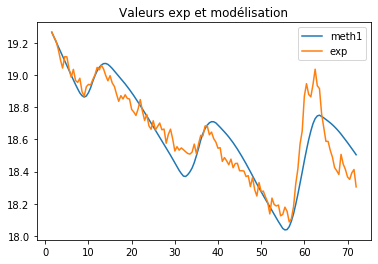

In [42]:
# Comparaison visuelle de la validité du modèle
model1 =  mod(T_int[0],T_ext, phi_sol,0.5,R,C,alpha,R_surf)
plt.plot(heure,model1, label = "meth1")
plt.plot(heure,T_int, label = 'exp')
plt.legend()
plt.title('Valeurs exp et modélisation')


#### Limites
Un point à vérifier serait la qualité des mesures et les conditions de l'expérience qui ne sont pass exactement connues. Par exemple, lorsqu'on regarde  le décrochage de température à 65h, on remarque que les conditions sont moins favorable que au pic de 10h. En effet la température extérieure est plus importante à 65h et donc la pertes de chaleur devrait être au moins plus petites. Or c'est l'inverse, cela pourrait être du à une fenêtre une porte ouverte. Ou alors une pluie qui refroidit les murs et qui donc augmente les pertes et baisse l'apport solaire. 

> Le problème possède plusieurs minimums locaux, pour converger vers une solution cohérente au terme de l'optimisation, il est nécessaire de placer le vecteur initial d'optimisation proche de valeurs attendus dans le cadre d'une maison classique ( Ex : Résistance thermique d'un mur entre 3 et 5 généralement)

#### Autre approche

On a ici fait le choix de trouver les paramètres qui permettent de valider le plus possible le modèle on aurait aussi pu déterminer les paramètres qui permettent d'approcher le plus possible la température. Cela revient à proposer de résoudre le problème suivant :
$$
\min_{\alpha, R_{th}, R_{surf} \in \mathbb{R}_+^3} {||T_{expérimental}-T||}
$$
sachant que $T$ suit la dynamique physique présentée plus haut, dépendant de $\alpha, R_{th} \ et \ R_{surf}$.

Text(0.5, 1.0, 'température _ext')

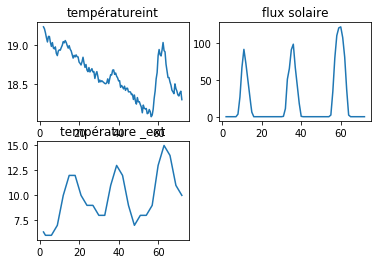

In [43]:
# Extraction des données
data = np.loadtxt('donnees-projet-gr4.txt')
data = data[3:] #même simplification que plus haut
heure = data.transpose()[0]
T_int = data.transpose()[1]
phi_sol = data.transpose()[2]
T_ext = data.transpose()[3]
plt.subplot((221))
plt.plot(heure,T_int)
plt.title('températureint')
plt.subplot((222))
plt.plot(heure,phi_sol)
plt.title('flux solaire')
plt.subplot(223)
plt.plot(heure,T_ext)
plt.title('température _ext')

In [54]:
def least_square(T_0,T_int, T_ext, phi_sol):
    def f(X):
        return (T_int-mod(T_0,T_ext,phi_sol,0.5,X[0],0,X[1],X[2]))
    res = optimize.least_squares(f,[200,0.005,5])
    return res.x, res.cost
# La méthode est moins stable
res,cost = least_square(T_int[0],T_int,T_ext,phi_sol)
R,alpha,R_surf = res
print('cost',cost)
V = (R/R_surf)**(3/2)   
C = 1004*V
#

cost 0.9895874898012578


In [55]:
print('===== \n')
print('MODELISATION DE LA MAISON \n ')
print('Murs de résistance équivalente', R,'\n')
print('Cube de côté a :', np.sqrt(R/R_surf), 'm','\n')
print('Mur de résistance surfacique', R_surf,'m^2KW^-1\n') 
print('Pourcentage du flux solaire chauffant la maison', alpha,'\n')
print('Capacité thermique de la maison', C,'JK^-1\n')
R1,alpha1,R_surf1  = R,alpha,R_surf

===== 

MODELISATION DE LA MAISON 
 
Murs de résistance équivalente 91.8153684298367 

Cube de côté a : 4.769111890066674 m 

Mur de résistance surfacique 4.036829044099676 m^2KW^-1

Pourcentage du flux solaire chauffant la maison 0.0001336700203731574 

Capacité thermique de la maison 108904.60594887895 JK^-1



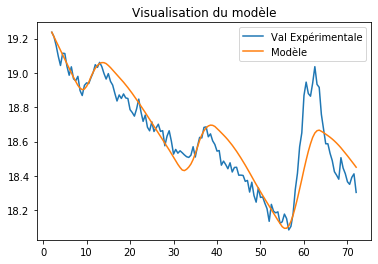

In [46]:
model2 = mod(T_int[0],T_ext, phi_sol,0.5,R,C,alpha,R_surf)
fig, ax1 = plt.subplots()

ax1.plot(heure,T_int, label = "Val Expérimentale")
ax1.plot(heure,model2,label = 'Modèle')

ax1.legend()
plt.title('Visualisation du modèle')
plt.show()

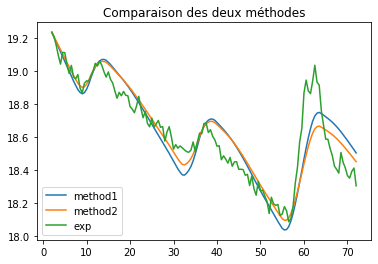

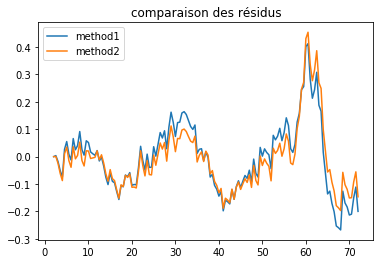

In [51]:
# Comparaison 
plt.plot(heure, model1[1:], label = 'method1')
plt.plot(heure, model2, label = 'method2')
plt.plot(heure, T_int, label = 'exp')
plt.legend()
plt.title('Comparaison des deux méthodes')
plt.show()

plt.plot(heure, T_int - model1[1:], label = 'method1')
plt.plot(heure, T_int-model2, label = "method2")
plt.legend()
plt.title('comparaison des résidus')
plt.show()


On remarque que du point de vue de l'approximation de la température la seconde méthode est meilleure. Cependant du point de vue de l'approximation du modèle cette méthode est plus faible en effet à terme la fonction de cou^t serait de 0.6 avec ces paramètres quand elle est de 0.1 avec les paramètres trouvés avec la première méthode. Cependant elle est soumis à une incertitude du fait de l'erreur accumulée par méthode de Euler on lui préferera donc la première méthode. Les ordres de grandeurs des paramètres rste tout de même les mêmes. 

### 4. Problème d'optimisation

Le problème d'optimisation est donc après discrétisation :
$$ {min}_{(w_i), i\in {1,..,N}} P(x)= \sum_{i=1}^N{p}_i^{p/c}w_i\tau $$
s.t.
$$ 0 \leq w_i \leq w_{max} -(1-2) $$
$$  20 ° C \leq Ti \leq 21°C - (3-4)$$
$$ T  \ vérifie \ (E) \ sous \ les \ paramètres \ déterminées\ au \  I.\ -(5)$$